# Exoplanet Habitable Classification using Machine Learning

In [ ]:
import pandas as pd

dataset=pd.read_csv('phl_exoplanet_catalog_2019.csv')
dataset




,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


In [ ]:
# Handling missing values


In [ ]:
print(dataset.isnull().sum())

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64


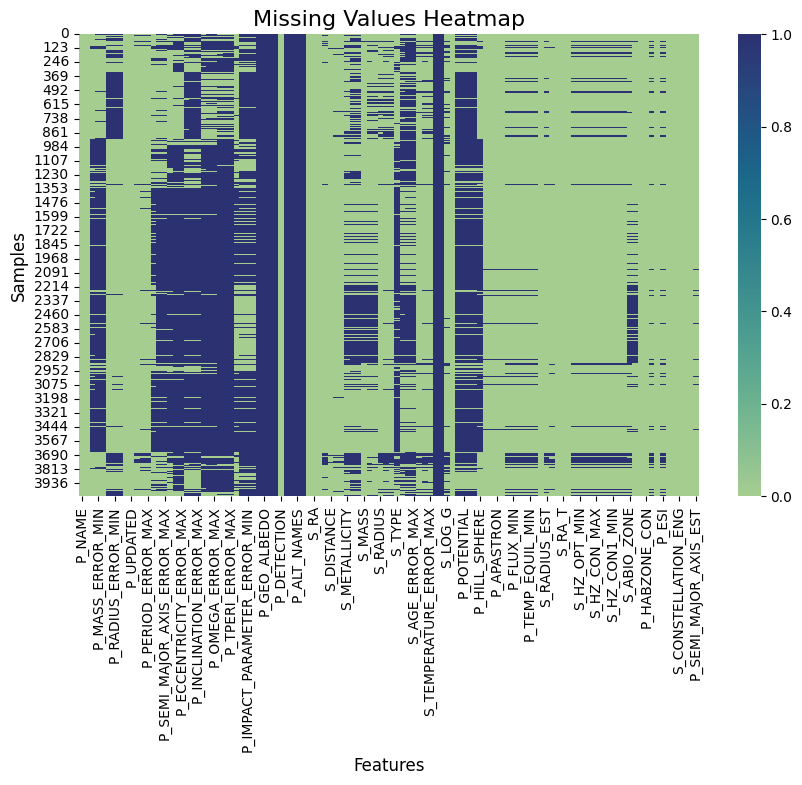

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

plt.figure(figsize=(10, 6))
#sns.heatmap(dataset.isnull(), cmap='YlGnBu')
sns.heatmap(dataset.isnull(), cmap="crest") # Remove 'glue' as it's undefined

sns.color_palette("rocket", as_cmap=True)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

In [ ]:
#Calculate the total number of examples
count = dataset.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((dataset.isnull().sum()/dataset.isnull().count())*100).\
sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(60)

,Count,%
P_DETECTION_MASS,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
S_MAGNETIC_FIELD,4048,100.000000
S_DISC,4048,100.000000
P_ATMOSPHERE,4048,100.000000
P_ALT_NAMES,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_GEO_ALBEDO_ERROR_MIN,4043,99.876482
P_TEMP_MEASURED,4043,99.876482
P_GEO_ALBEDO_ERROR_MAX,4043,99.876482


In [ ]:
#Drop columns containing more than 40% missing data
dataset_cols_dropped = dataset.drop(['P_DETECTION_MASS', 'P_GEO_ALBEDO',\
'S_MAGNETIC_FIELD', 'S_DISC', 'P_ATMOSPHERE', 'P_ALT_NAMES', \
'P_DETECTION_RADIUS', 'P_GEO_ALBEDO_ERROR_MIN', 'P_TEMP_MEASURED',\
'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', \
'P_TPERI', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_DENSITY', \
'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_OMEGA', \
'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION',\
'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_TYPE', \
'P_ECCENTRICITY','P_IMPACT_PARAMETER_ERROR_MIN', \
'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX',\
'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',\
'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_MASS', 'S_AGE_ERROR_MAX', \
'S_AGE_ERROR_MIN', 'S_AGE', 'P_ANGULAR_DISTANCE', 'P_SEMI_MAJOR_AXIS'], \

axis = 1)

In [ ]:
dataset_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   float64
 2   P_RADIUS                 3139 non-null   float64
 3   P_RADIUS_ERROR_MIN       3105 non-null   float64
 4   P_RADIUS_ERROR_MAX       3105 non-null   float64
 5   P_YEAR                   4048 non-null   int64  
 6   P_UPDATED                4048 non-null   object 
 7   P_PERIOD                 3938 non-null   float64
 8   P_PERIOD_ERROR_MIN       3807 non-null   float64
 9   P_PERIOD_ERROR_MAX       3807 non-null   float64
 10  P_DETECTION              4048 non-null   object 
 11  S_NAME                   4048 non-null   object 
 12  S_RA                     4048 non-null   float64
 13  S_DEC                    4048 non-null   float64
 14  S_MAG                   

In [ ]:
#Print the categorical features
dataset_cols_dropped.select_dtypes(include = ['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_ALT_NAMES', 'P_TYPE',
       'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [ ]:
#Single the missing data out - categorical features

#Put the categorial columns in the object_cols
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

#Print the percentage of each column which belongs to the missing data
count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_TYPE_TEMP,327,8.078063
S_TYPE_TEMP,136,3.359684
P_TYPE,17,0.419960
P_NAME,0,0.000000
P_UPDATED,0,0.000000
P_DETECTION,0,0.000000
S_NAME,0,0.000000
S_ALT_NAMES,0,0.000000
S_RA_T,0,0.000000
S_DEC_T,0,0.000000


In [ ]:
#Fill in the missing data in categorical columns using mode

dataset_cols_dropped['P_TYPE_TEMP'] = dataset_cols_dropped['P_TYPE_TEMP']\
.fillna(dataset_cols_dropped['P_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['S_TYPE_TEMP'] = dataset_cols_dropped['S_TYPE_TEMP'].\
fillna(dataset_cols_dropped['S_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['P_TYPE'] = dataset_cols_dropped['P_TYPE'].fillna\
(dataset_cols_dropped['P_TYPE'].mode()[0])

In [ ]:
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_NAME,0,0.0
P_UPDATED,0,0.0
P_DETECTION,0,0.0
S_NAME,0,0.0
S_ALT_NAMES,0,0.0
P_TYPE,0,0.0
S_TYPE_TEMP,0,0.0
S_RA_T,0,0.0
S_DEC_T,0,0.0
P_TYPE_TEMP,0,0.0


In [ ]:
#Convert categorical values to numeric values
from sklearn.preprocessing import LabelEncoder

#Define a dictionaryfor encoded labels
encoders = {}

#Encode each member of encoders dictionary
for col in dataset_cols_dropped.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    #Fit the encoded labels into dataset
    dataset_cols_dropped[col] = encoders[col].fit_transform(dataset_cols_dropped[col])

In [ ]:
#Impute in the missing data with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Deep copy current dataset into Mice_temp_data
imputed_data = dataset_cols_dropped.copy(deep = True)

#Set the estimator to estimate features based on other features
mice_imputer = IterativeImputer()

#Fit-transform the imputed columns in the dataset
imputed_data.iloc[:, :] = mice_imputer.fit_transform(dataset_cols_dropped)

imputed_data.head(6)

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,4.798394,8.416078,-1.863129,2007,0,326.03000,-0.32,0.32,...,0,1,0,0.083813,24,24,5,12.082709,6165.86330,1.29
1,1,3.0,4.798394,8.416078,-1.863129,2009,146,516.21997,-3.20,3.20,...,0,1,0,0.082414,83,83,42,12.229641,4684.78480,1.53
2,2,3.0,4.798394,8.416078,-1.863129,2008,0,185.84000,-0.23,0.23,...,0,1,0,0.081917,0,0,2,12.848516,1525.57440,0.83
3,3,3.0,4.798394,8.416078,-1.863129,2002,146,1773.40000,-2.50,2.50,...,0,0,0,0.145241,39,39,34,12.865261,1481.07850,2.93
4,4,3.0,4.798394,8.416078,-1.863129,1996,146,798.50000,-1.00,1.00,...,1,2,0,0.368627,30,30,75,13.421749,565.73385,1.66
5,5,3.0,4.798394,8.416078,-1.863129,2008,0,993.30000,-3.20,3.20,...,0,1,0,0.216174,31,31,22,12.424038,3273.62840,2.60


In [ ]:
#Print the number of missing values in Mice_temp_data
imputed_data.isna().sum(axis = 0)

,0
P_NAME,0
P_STATUS,0
P_RADIUS,0
P_RADIUS_ERROR_MIN,0
P_RADIUS_ERROR_MAX,0
...,...
S_CONSTELLATION_ABR,0
S_CONSTELLATION_ENG,0
P_RADIUS_EST,0
P_MASS_EST,0


In [ ]:
#Class distribution before sampling
from collections import Counter
counter_ = Counter(imputed_data['P_HABITABLE'])
for class_label_, example_num_ in counter_.items():
    percentage_ = example_num_ / len(imputed_data['P_HABITABLE']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label_, example_num_, percentage_))

Class=0, n=3993 (98.641%)
Class=2, n=34 (0.840%)
Class=1, n=21 (0.519%)


In [ ]:
#Resolve the imbalance
from imblearn.combine import SMOTEENN

#Split the dataset
X, y = imputed_data.drop(['P_HABITABLE'], axis = 1), imputed_data.P_HABITABLE

#Apply sampling method and fit the resampled into data
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X, y)

#The distribution after applying SMOTEENN
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num, percentage))

Class=0, n=3843 (32.925%)
Class=1, n=3993 (34.210%)
Class=2, n=3836 (32.865%)


In [ ]:
#concatenate X and y into a new dataset
sampled_data = X
sampled_data['P_HABITABLE'] = y

In [ ]:
sampled_data.shape

(11672, 71)

In [ ]:
#Correlation Analysis
correlation_mat = sampled_data.corr().abs()
#print (correlation_mat)

<Axes: >

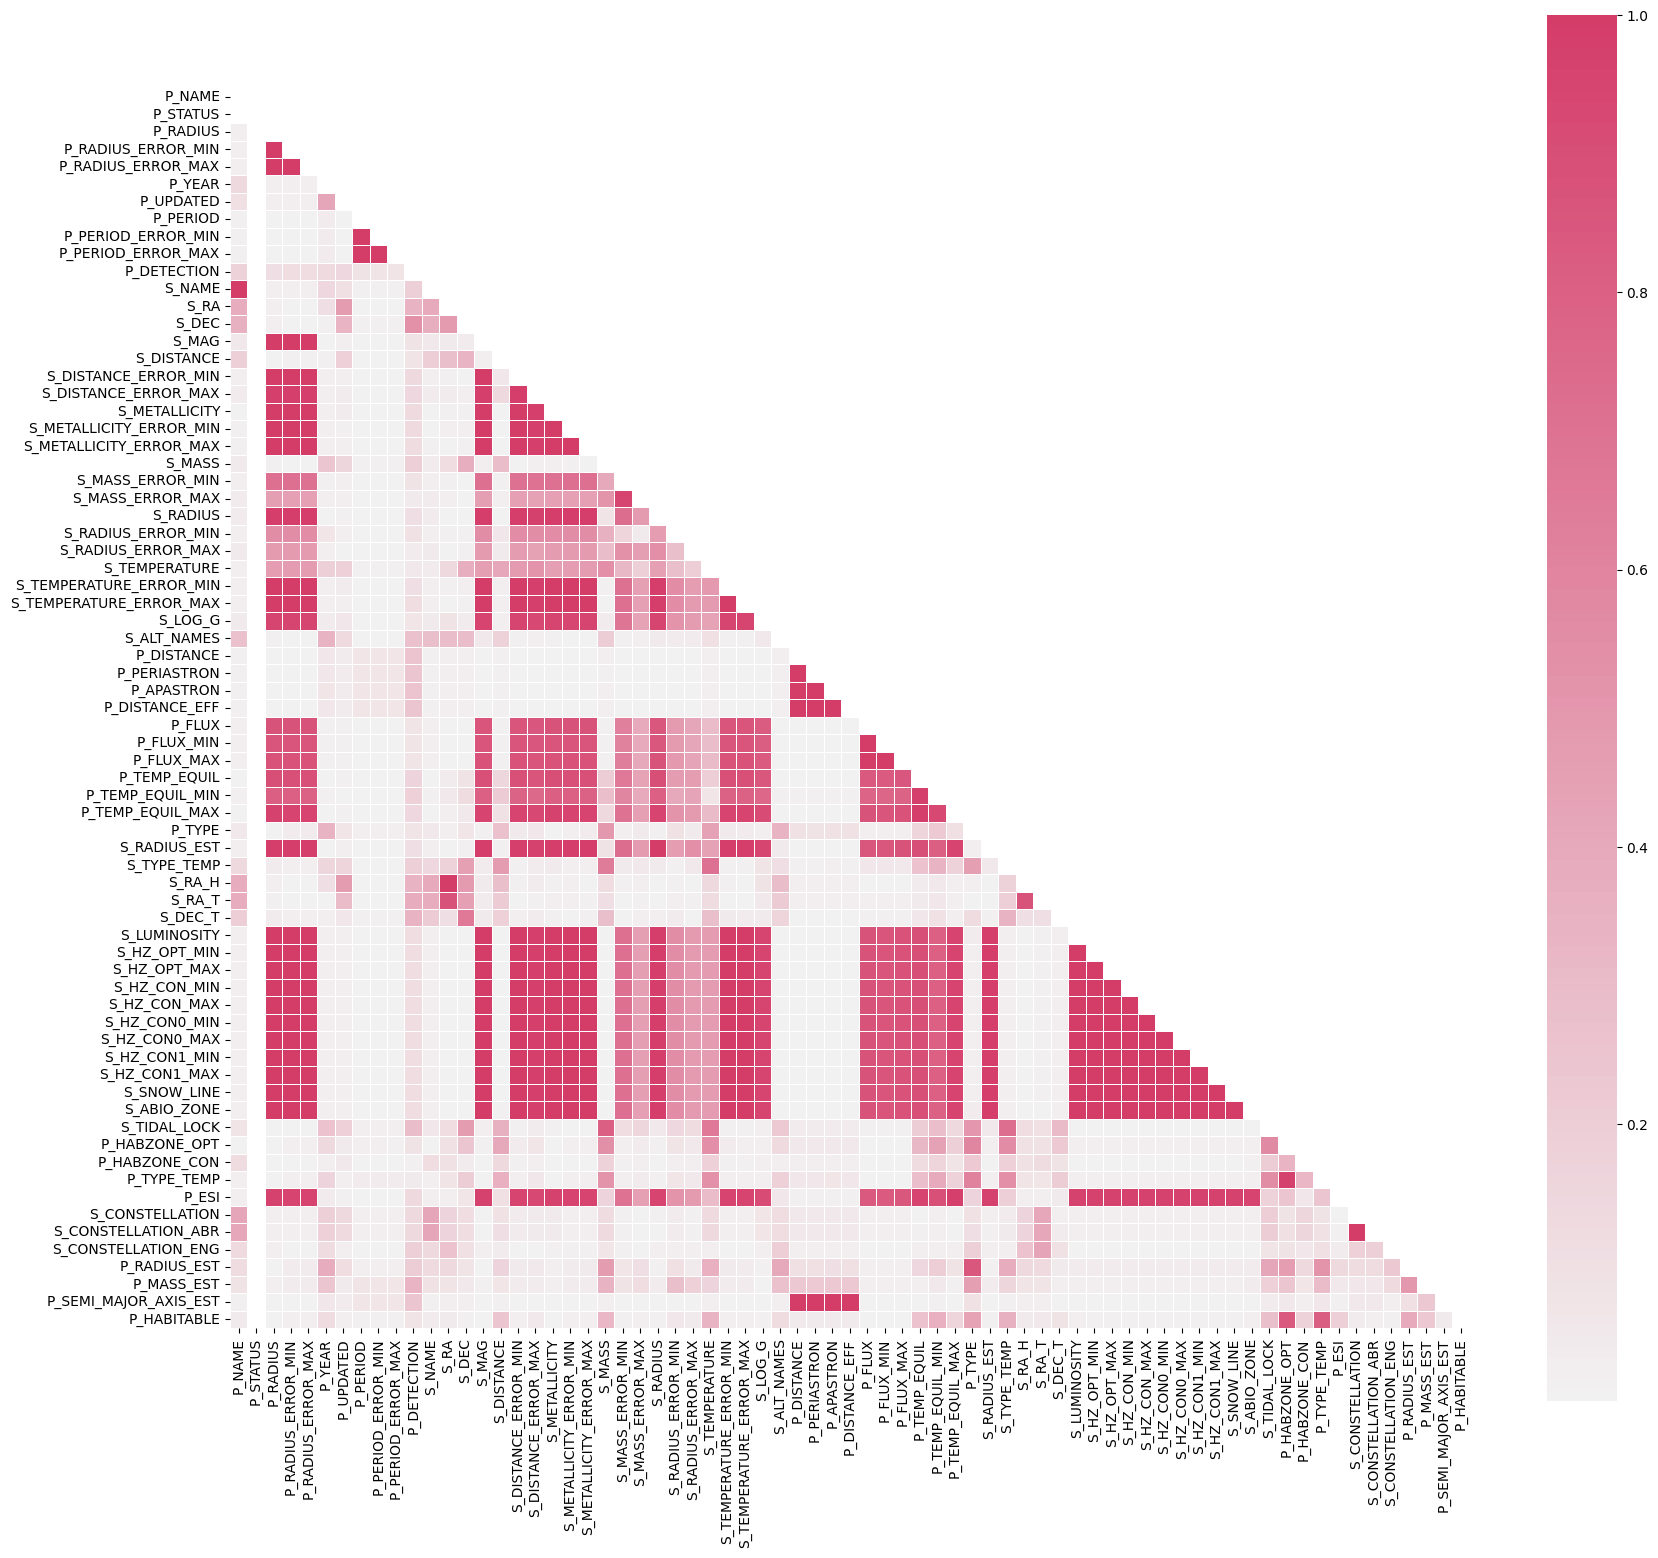

In [ ]:
#Plot the correlation matrix
import numpy as np

import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = False, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

In [ ]:
#Return the dimensions of the correlation_mat using shape()
#Return the upper triangle using np.triu
#Convert ones and zeros to boolean falses and trues using astype(np.bool_)
#Use where() to return those indices where values exist
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

#Set up an array of the columns to be dropped (correlation greater than 95%)
to_drop = [column for column in upper_triangle.columns if \
any(upper_triangle[column] > .95)]

#Print the list of the columns to be dropped
print(to_drop)

['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST']


In [ ]:
#Drop the columns with correlation greater than 95%
preprocessed_data = sampled_data.drop(['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX',\
'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN',\
'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN',\
'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN',\
'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF',\
'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST',\
'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',\
'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',\
'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis = 1)
preprocessed_data.head()

#preprocessed_data.shape

,P_NAME,P_STATUS,P_RADIUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_RA,S_DEC,S_DISTANCE,...,S_RA_T,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_HABITABLE
0,0,3.0,4.798394,2007,0,326.03000,7,185.17928,17.792868,93.37,...,687,259,0.642400,0,0,24,5,12.082709,6165.86330,0
1,1,3.0,4.798394,2009,146,516.21997,7,229.27454,71.823898,125.72,...,847,2236,0.648683,0,0,83,42,12.229641,4684.78480,0
2,2,3.0,4.798394,2008,0,185.84000,7,352.82257,39.236198,75.59,...,2982,611,0.600010,0,0,0,2,12.848516,1525.57440,0
3,3,3.0,4.798394,2002,146,1773.40000,7,242.60130,43.817646,17.94,...,890,1203,0.445415,0,0,39,34,12.865261,1481.07850,0
4,4,3.0,4.798394,1996,146,798.50000,7,295.46655,50.517525,21.15,...,2448,2114,0.473325,1,1,30,75,13.421749,565.73385,0


In [ ]:
#Feature Selection
#Split dataset into feature matrix and target tuple
feature_mat = preprocessed_data.drop('P_HABITABLE', axis = 1)
target = preprocessed_data['P_HABITABLE']

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#Use split data: feature_mat and target
estimator = rf(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(rf(n_estimators = 1000, random_state = 0).fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False  True False
 False False False  True False False  True  True  True False False False
  True  True False False False  True  True]
['S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01011954 0.         0.01341369 0.00214614 0.00096326 0.03099569
 0.00421972 0.00242623 0.00480886 0.02942088 0.0466507  0.00636254
 0.01085003 0.00581407 0.00401169 0.04932591 0.00151618 0.0274125
 0.12337267 0.11660035 0.14456932 0.01018317 0.00212827 0.00214191
 0.03321273 0.13773935 0.00039486 0.00475791 0.0009992  0.08453919
 0.08890345]


In [ ]:
#Feature Selection using AdaBoost
from sklearn.ensemble import AdaBoostRegressor as Ada

#Use split data: feature_mat and target
estimator = Ada(random_state = 0, n_estimators = 50)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [ True False False False False  True False False False False False False
 False False False False False False  True False  True False False False
 False  True False False False False  True]
['P_NAME', 'P_PERIOD', 'P_FLUX', 'P_TYPE', 'P_HABZONE_OPT', 'P_MASS_EST']
[5.25937794e-02 0.00000000e+00 1.54029246e-02 1.82560658e-03
 0.00000000e+00 3.55865035e-02 0.00000000e+00 0.00000000e+00
 4.30295987e-03 2.38061704e-02 3.21804356e-02 0.00000000e+00
 0.00000000e+00 3.29915263e-04 8.45905228e-03 2.50111524e-02
 0.00000000e+00 5.57902028e-03 1.18493914e-01 2.69433147e-02
 3.74909000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.13155624e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.23487334e-02 3.90718931e-02]


In [ ]:
del features
del estimator
del selector
del status

In [ ]:
#Feature Selection using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier as et

#Use split data: feature_mat and target
estimator = et(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False False False
 False False False False False False False  True  True False False False
  True  True False False False  True False]
['P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST']
[0.03021291 0.         0.01906354 0.00595271 0.00854241 0.01252369
 0.02894596 0.01186395 0.02199701 0.01926008 0.030602   0.0060956
 0.00671099 0.00791067 0.005979   0.02711028 0.00774203 0.01102735
 0.01466379 0.03473564 0.1623475  0.03101826 0.01067947 0.01223249
 0.04227165 0.31016156 0.01969855 0.01806531 0.01118071 0.04402847
 0.02737643]


In [ ]:
del feature_mat
del target
del X
del y

In [ ]:
#Modeling
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#The feature_mat has to consist of only the features
#we have selected in Feature Selection phase
feature_mat = preprocessed_data[['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL',\
'P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP']]

#The target column to test with
target = preprocessed_data['P_HABITABLE']

#Split the feature_mat and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_mat, target,\
test_size = 0.33, random_state = 42)

print(f"X_train dimentions: {X_train.shape}")
print(f"X_test dimentions: {X_test.shape}")
print(f"y_train dimentions: {y_train.shape}")
print(f"y_test dimentions: {y_test.shape}")

X_train dimentions: (7820, 8)
X_test dimentions: (3852, 8)
y_train dimentions: (7820,)
y_test dimentions: (3852,)


In [ ]:
#Normalize the training set
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Multi-class classification
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Find the best parameters for Decision Tree using GridSearchCV
#Hyperparameters' range
param_grid = {'max_depth': np.arange(2, 10, 1),
              'max_leaf_nodes': np.arange(2, 100, 10),
              'random_state': [0, 1, 2, 3, 4, 5],
              'splitter': ['best', 'random']}

#Conduct the Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid = param_grid,
                           refit = True, verbose = 0)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 12, 'random_state': 0, 'splitter': 'best'}


In [ ]:
#Confusion Matrix plotting function

from sklearn.metrics import confusion_matrix

def plot_confusion_mat(ytest, ypred):
    #Create  a confusion matrix, which compares the y_test and prediction made
    conf_mat = confusion_matrix(ytest, ypred)

    #Create a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    #Assign corresponding names to labels
    confusion_mat_df = pd.DataFrame(conf_mat,
                         index = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'],
                         columns = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'])

    #Plot the confusion matrix
    plt.figure(figsize = (5,4))
    sns.heatmap(confusion_mat_df, annot = True, cmap='Blues', fmt="d")
    plt.title('Habitability Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

    return conf_mat

# Decision Tree - Classification


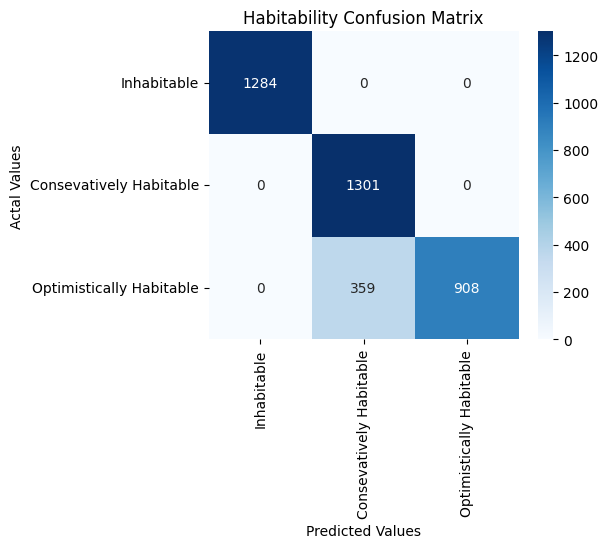

Decision Tree classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       0.78      1.00      0.88      1301
           2       1.00      0.72      0.83      1267

    accuracy                           0.91      3852
   macro avg       0.93      0.91      0.90      3852
weighted avg       0.93      0.91      0.90      3852



In [ ]:
#Decision Tree - Classification

import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
dtree_model = DecisionTreeClassifier(splitter = 'random',
                                     max_depth = 6,
                                     random_state = 0,
                                     max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
dtree_predictions = dtree_model.predict(X_test)

#Calculate the time taken for further comparison
dtree_time = time.time() - t0

#Store accuracy for final model comparison
dtree_accuracy = accuracy_score(y_test, dtree_predictions)

#Plot the Confusion Matrix by calling the function
confusion_mat = plot_confusion_mat(y_test, dtree_predictions)

#Classification Report
print(f"Decision Tree classification Report:\n")
print(classification_report(y_test, dtree_predictions))

del confusion_mat
del t0

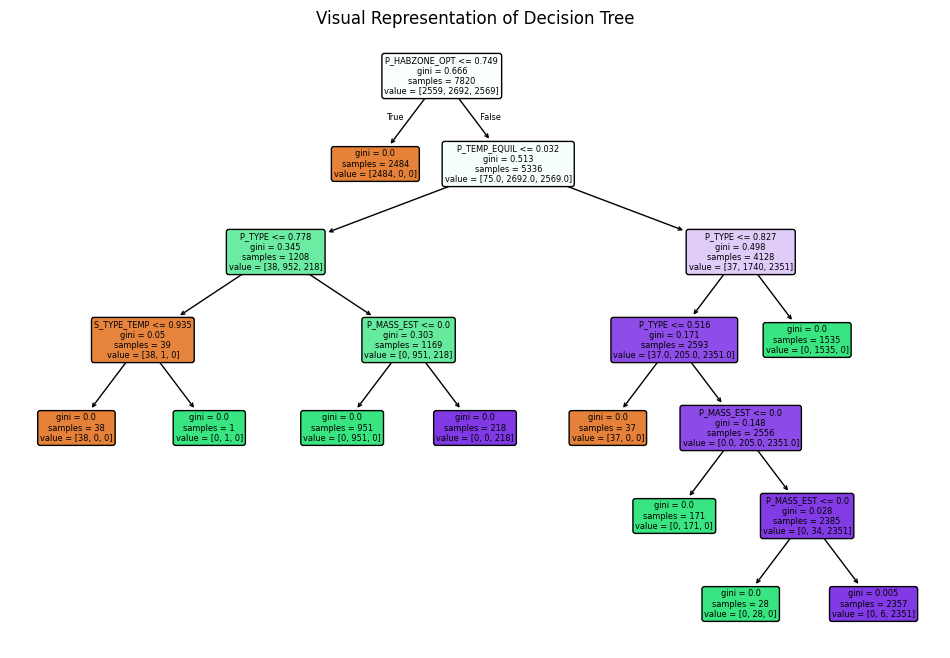

In [ ]:
import time
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ... (rest of your code) ...

# Store the original column names before scaling
feature_names = feature_mat.columns

plt.figure(figsize=(12, 8))
plot_tree(dtree_model, filled=True, feature_names=feature_names, rounded=True)
plt.title('Visual Representation of Decision Tree')
plt.show()



# KNN classifier - Classification

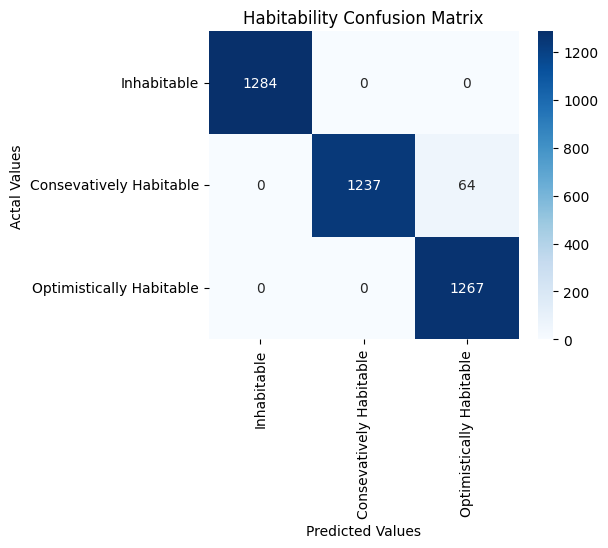

KNN classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.95      0.97      1301
           2       0.95      1.00      0.98      1267

    accuracy                           0.98      3852
   macro avg       0.98      0.98      0.98      3852
weighted avg       0.98      0.98      0.98      3852



In [ ]:
#KNN classifier - Classification
from sklearn.neighbors import KNeighborsClassifier

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
knn_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

#Test the model
knn_predictions = knn_model.predict(X_test)

#Calculate the time taken for further comparison
knn_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
knn_accuracy = accuracy_score(y_test, knn_predictions)

#Plot the Confusion Matrix by calling the function
confusion_mat = plot_confusion_mat(y_test, knn_predictions)

#Classification Report
print(f"KNN classification Report:\n")
print(classification_report(y_test, knn_predictions))

del confusion_mat
del t0

# Gradient Boosting classification

In [ ]:
#Gradient Boosting classification
#GridSearchCV
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#Find the best parameters for Gradient Boosting using GridSearchCV
#Hyperparameters' range

param_grid = {'criterion': ['friedman_mse',  'mse'],
              'n_estimators': np.arange(10, 100, 10)}

#Conduct the Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(),
                           param_grid = param_grid,
                           refit = True, verbose = 1)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': 90}


# RandomTress Classifers

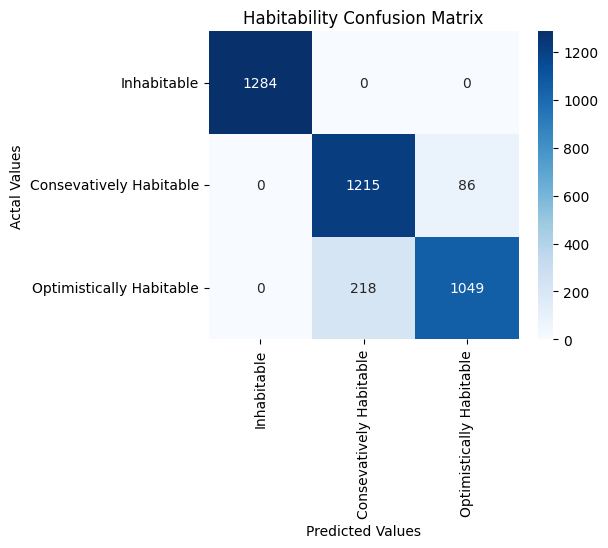

Random Trees classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       0.85      0.93      0.89      1301
           2       0.92      0.83      0.87      1267

    accuracy                           0.92      3852
   macro avg       0.92      0.92      0.92      3852
weighted avg       0.92      0.92      0.92      3852



In [ ]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.metrics import accuracy_score, classification_report
import time
from sklearn.linear_model import LogisticRegression # Added LogisticRegression estimator
import matplotlib.pyplot as plt

# Set the start time for Random Trees
t0_rt = time.time()

# Train the RandomTreesEmbedding model
rt_model = RandomTreesEmbedding().fit(X_train, y_train)

# Transform the data using the trained RandomTreesEmbedding model
rt_transformed = rt_model.transform(X_train)

# Train a LogisticRegression model on the transformed data
logreg_model = LogisticRegression(random_state=0)
logreg_model.fit(rt_transformed, y_train)

# Transform the test data using the trained RandomTreesEmbedding model
rt_predictions = rt_model.transform(X_test)

# Make predictions using the trained LogisticRegression model
rt_predictions = logreg_model.predict(rt_predictions)


# Calculate the time taken for further comparison
rt_time = time.time() - t0_rt

# Store accuracy and elapsed time for final model comparison
rt_accuracy = accuracy_score(y_test, rt_predictions)

# Plot the Confusion Matrix by calling the function
confusion_mat_rt = plot_confusion_mat(y_test, rt_predictions)

# Classification Report
print(f"Random Trees classification Report:\n")
print(classification_report(y_test, rt_predictions))

del confusion_mat_rt
del t0_rt

# ExtraTreeClassifer

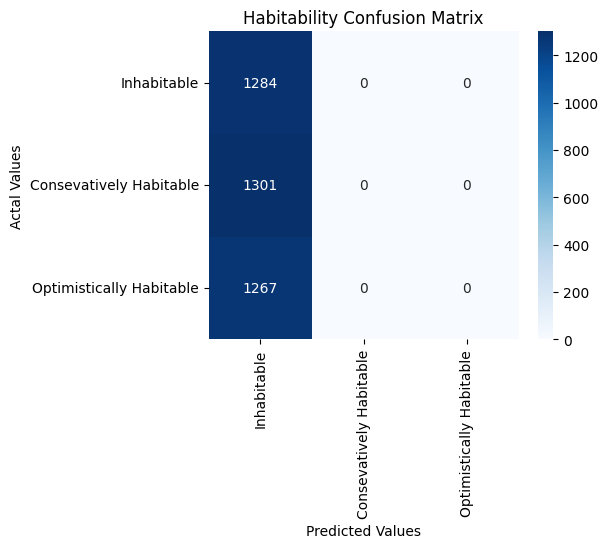

Extra Trees classification Report:

              precision    recall  f1-score   support

           0       0.33      1.00      0.50      1284
           1       0.00      0.00      0.00      1301
           2       0.00      0.00      0.00      1267

    accuracy                           0.33      3852
   macro avg       0.11      0.33      0.17      3852
weighted avg       0.11      0.33      0.17      3852



In [ ]:
# Updated code for ipython-input-158-676eaae06130:

from sklearn.ensemble import ExtraTreesClassifier

# Set the start time for Extra Trees
t0_etc = time.time()

# Train the model
etc_model = ExtraTreesClassifier().fit(X_train, y_train)

# Test the model
etc_predictions = etc_model.predict(X_test)

# Calculate the time taken for further comparison
etc_time = time.time() - t0_etc

# Store accuracy and elapsed time for final model comparison
etc_accuracy = accuracy_score(y_test, etc_predictions)

# Plot the Confusion Matrix by calling the function, providing the model name
# Assuming 'Extra Trees' is the desired model name
#confusion_mat_etc = plot_confusion_mat(y_test, etc_predictions, 'Extra Trees')
confusion_mat_etc = plot_confusion_mat(y_test, etc_predictions)
# Classification Report
print(f"Extra Trees classification Report:\n")
print(classification_report(y_test, etc_predictions))

del confusion_mat_etc
del t0_etc

# XGBoost Random Forest classification

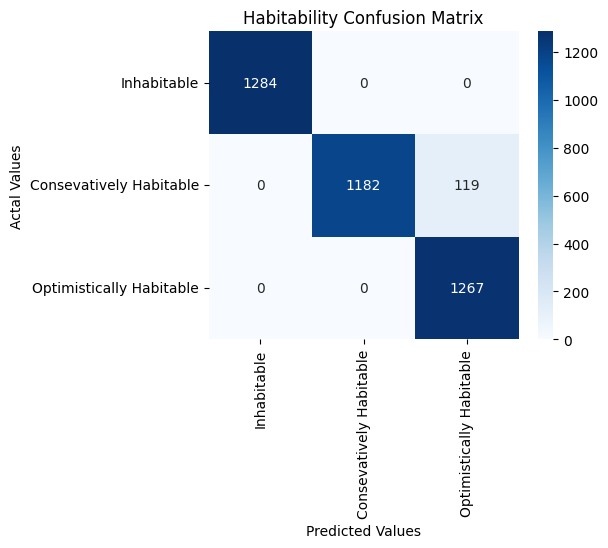

XGBoost Random Forest classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.91      0.95      1301
           2       0.91      1.00      0.96      1267

    accuracy                           0.97      3852
   macro avg       0.97      0.97      0.97      3852
weighted avg       0.97      0.97      0.97      3852



In [ ]:
import xgboost as xgb

# Set the start time for XGBoost
t0_xgbrf = time.time()

# Train the model
xgbrf_model = xgb.XGBRFClassifier().fit(X_train, y_train)

# Test the model
xgbrf_predictions = xgbrf_model.predict(X_test)

# Calculate the time taken for further comparison
xgbrf_time = time.time() - t0_xgbrf

# Store accuracy and elapsed time for final model comparison
xgbrf_accuracy = accuracy_score(y_test, xgbrf_predictions)

# Plot the Confusion Matrix by calling the function
confusion_mat_xgbrf = plot_confusion_mat(y_test, xgbrf_predictions)

# Classification Report
print(f"XGBoost Random Forest classification Report:\n")
print(classification_report(y_test, xgbrf_predictions))

del confusion_mat_xgbrf
del t0_xgbrf

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


# CatBoost classification

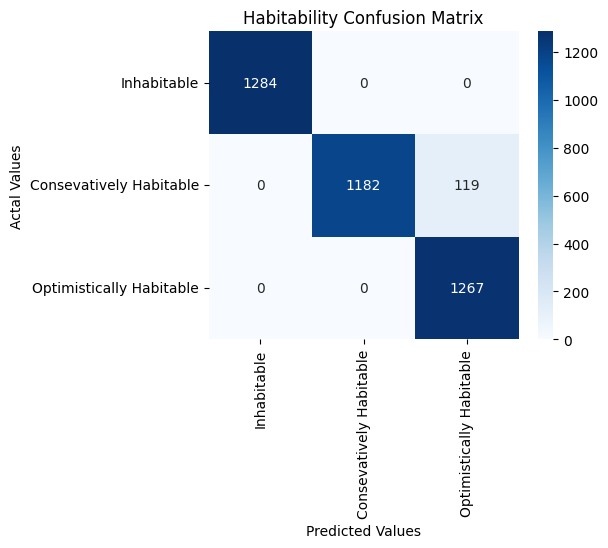

CatBoost classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.91      0.95      1301
           2       0.91      1.00      0.96      1267

    accuracy                           0.97      3852
   macro avg       0.97      0.97      0.97      3852
weighted avg       0.97      0.97      0.97      3852



In [ ]:
from catboost import CatBoostClassifier

# Set the start time for CatBoost
t0_catboost = time.time()

# Train the model
catboost_model = CatBoostClassifier(verbose=0).fit(X_train, y_train)

# Test the model
catboost_predictions = catboost_model.predict(X_test)

# Calculate the time taken for further comparison
catboost_time = time.time() - t0_catboost

# Store accuracy and elapsed time for final model comparison
catboost_accuracy = accuracy_score(y_test, catboost_predictions)

# Plot the Confusion Matrix by calling the function
confusion_mat_catboost = plot_confusion_mat(y_test, catboost_predictions)

# Classification Report
print(f"CatBoost classification Report:\n")
print(classification_report(y_test, catboost_predictions))

del confusion_mat_catboost
del t0_catboost

# Support Vecotr classifcation

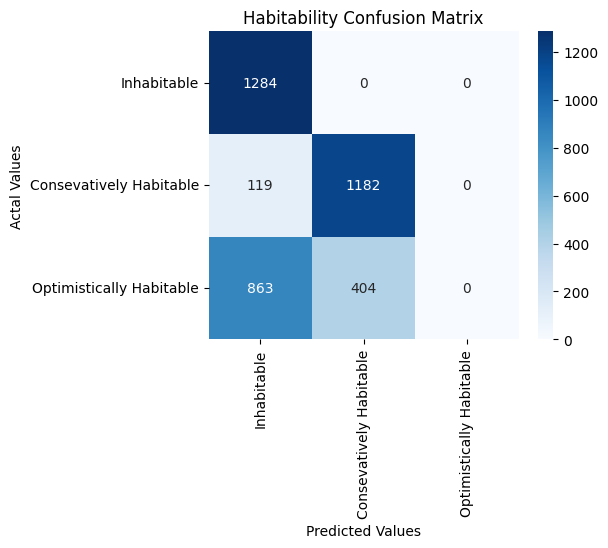

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      1284
           1       0.75      0.91      0.82      1301
           2       0.00      0.00      0.00      1267

    accuracy                           0.64      3852
   macro avg       0.44      0.64      0.51      3852
weighted avg       0.44      0.64      0.52      3852



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# Set the start time for SVM
t0_svc = time.time()

# Train the SVM model
svc_model = SVC().fit(X_train, y_train)

# Test the model
svc_predictions = svc_model.predict(X_test)

# Calculate the time taken for further comparison
svc_time = time.time() - t0_svc

# Store accuracy and elapsed time for final model comparison
svc_accuracy = accuracy_score(y_test, svc_predictions)

# Plot the Confusion Matrix by calling the function
confusion_mat_svc = plot_confusion_mat(y_test, svc_predictions)

# Classification Report
print(f"SVM Classification Report:\n")
print(classification_report(y_test, svc_predictions))

del confusion_mat_svc
del t0_svc

# "Logistic Regression Classification

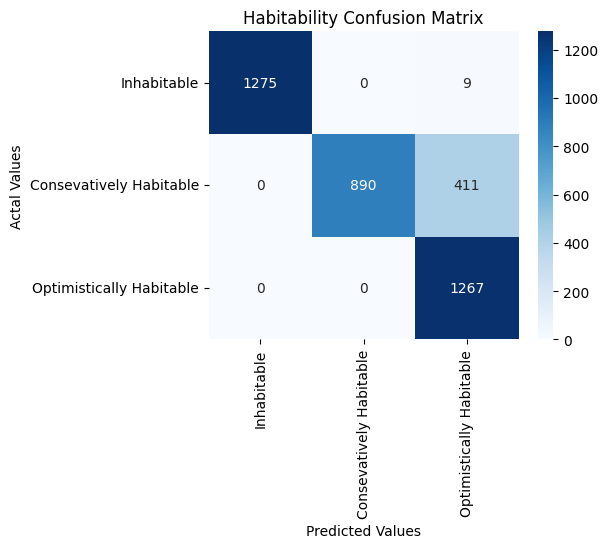

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1284
           1       1.00      0.68      0.81      1301
           2       0.75      1.00      0.86      1267

    accuracy                           0.89      3852
   macro avg       0.92      0.89      0.89      3852
weighted avg       0.92      0.89      0.89      3852



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Set the start time for Logistic Regression
t0_lr = time.time()

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Test the model
lr_predictions = lr_model.predict(X_test)

# Calculate the time taken for further comparison
lr_time = time.time() - t0_lr

# Store accuracy and elapsed time for final model comparison
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Plot the Confusion Matrix by calling the function
confusion_mat_lr = plot_confusion_mat(y_test, lr_predictions)

# Classification Report
print(f"Logistic Regression Classification Report:\n")
print(classification_report(y_test, lr_predictions))

del confusion_mat_lr
del t0_lr

# GrandientBoosting

Gradient Boosting Classifier:
Accuracy: 96.91%
Time taken: 6.81 seconds



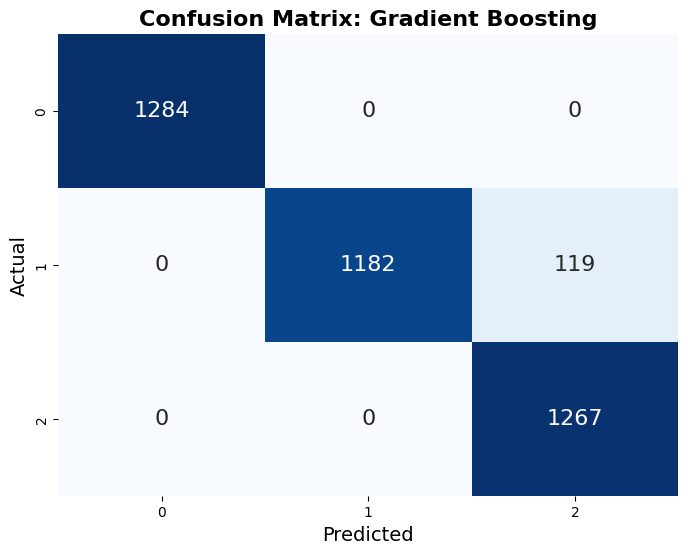

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1284
           1      1.000     0.909     0.952      1301
           2      0.914     1.000     0.955      1267

    accuracy                          0.969      3852
   macro avg      0.971     0.970     0.969      3852
weighted avg      0.972     0.969     0.969      3852



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix with improved visualization
def plot_confusion_mat(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.show()

# Start timer for Gradient Boosting
t0_gb = time.time()

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

# Test the model
gb_predictions = gb_model.predict(X_test)

# End timer and calculate the time taken
gb_time = time.time() - t0_gb

# Calculate the accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Enhanced output for time and accuracy
print(f"Gradient Boosting Classifier:")
print(f"Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Time taken: {gb_time:.2f} seconds\n")

# Plot the Confusion Matrix
plot_confusion_mat(y_test, gb_predictions, "Gradient Boosting")

# Enhanced Classification Report
print(f"Classification Report for Gradient Boosting:\n")
print(classification_report(y_test, gb_predictions, digits=3))

# Clean up variables (if needed)
del t0_gb


# Model Comparession

In [ ]:
def plot_model_log(log):

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax1.set_title('Accuracy and Time taken', fontsize = 13)
    color = 'tab:green'
    ax1.set_xlabel('Classifier', fontsize = 13)
    ax1.set_ylabel('Time taken', fontsize = 13, color = color)
    ax2 = sns.barplot(x = 'Classifier', y = 'Time taken', data = log, palette = 'summer')
    ax1.tick_params(axis = 'y')
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', fontsize = 13, color = color)
    ax2 = sns.lineplot(x = 'Classifier', y = 'Accuracy', data = log, sort = False, color = color)
    ax2.tick_params(axis = 'y', color = color)

            Classifier  Accuracy  Time taken (s)  Accuracy %  Rank
1                  KNN  0.983385        0.334987   98.338525   1.0
2             CatBoost  0.969107       17.840816   96.910696   3.0
3                XGBRF  0.969107        3.088582   96.910696   3.0
6    Gradient Boosting  0.969107        1.565183   96.910696   3.0
4        Random Forest  0.921080        0.861574   92.107996   5.0
0        Decision Tree  0.906802        0.011507   90.680166   6.0
8  Logistic Regression  0.890966        6.805052   89.096573   7.0
7                  SVC  0.640187        0.080198   64.018692   8.0
5          Extra Trees  0.333333        0.666281   33.333333   9.0


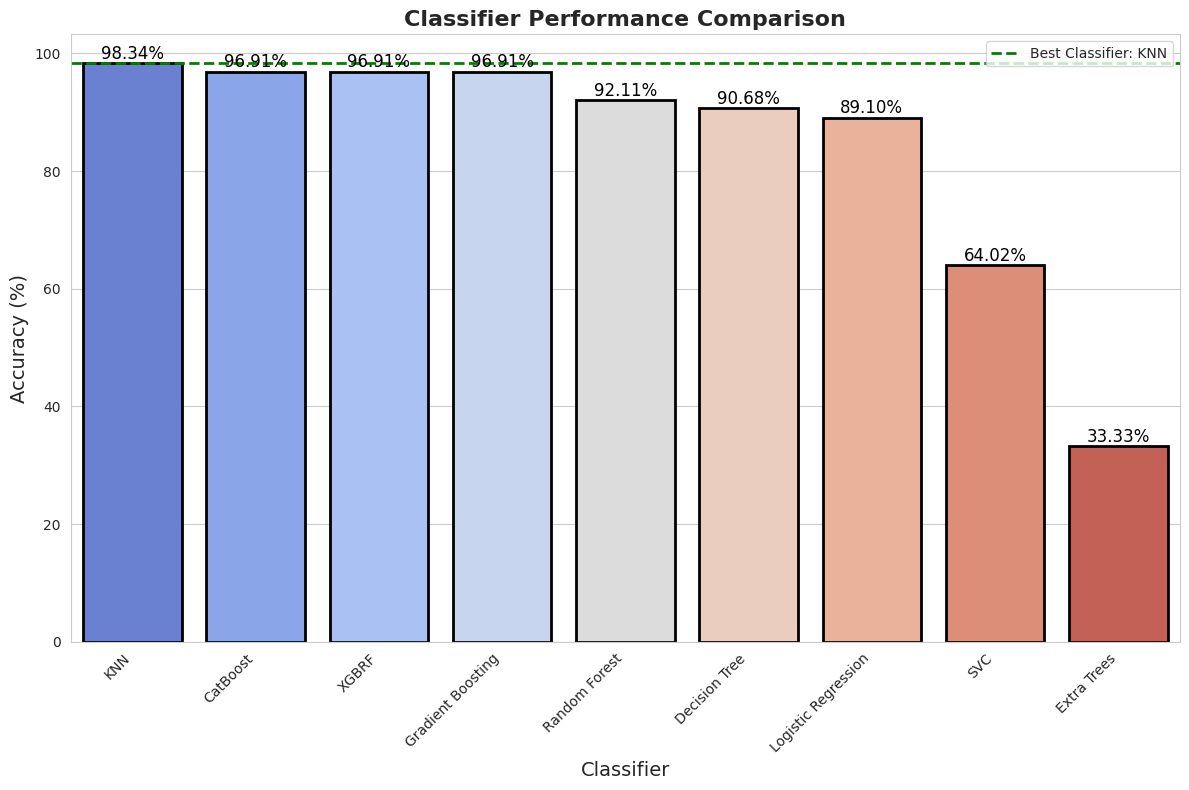

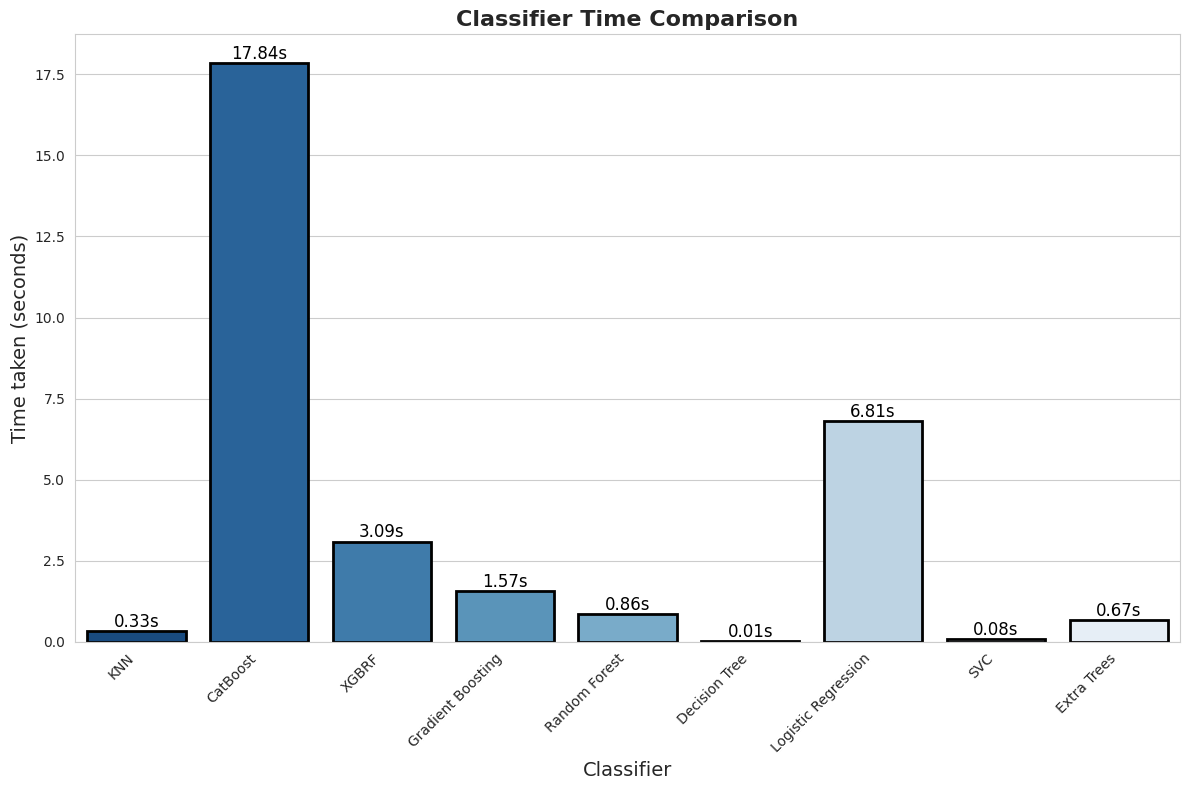

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of accuracies and times for classifiers
accuracy_list = [dtree_accuracy, knn_accuracy, catboost_accuracy, xgbrf_accuracy, rt_accuracy, etc_accuracy, gb_accuracy, svc_accuracy, lr_accuracy]
time_list = [dtree_time, knn_time, catboost_time, xgbrf_time, rt_time, etc_time, svc_time, lr_time, gb_time]

# Creating a log dataframe with classifier information
log_data = {'Classifier': ['Decision Tree', 'KNN', 'CatBoost', 'XGBRF', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'SVC', 'Logistic Regression'],
            'Accuracy': accuracy_list,
            'Time taken (s)': time_list}

clf_log = pd.DataFrame(log_data)

# Calculate additional statistics
clf_log['Accuracy %'] = clf_log['Accuracy'] * 100  # Convert accuracy to percentage
clf_log['Rank'] = clf_log['Accuracy'].rank(ascending=False)  # Ranking classifiers by accuracy

# Sorting by accuracy for clearer visualization
clf_log = clf_log.sort_values(by='Accuracy', ascending=False)

# Print the dataframe to check
print(clf_log)

# Plotting the data using Seaborn for enhanced visualization
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a bar plot for accuracy
ax = sns.barplot(x='Classifier', y='Accuracy %', data=clf_log, palette='coolwarm', edgecolor='black', linewidth=2)
ax.set_title('Classifier Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('Classifier', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# Highlight top-performing classifier
top_accuracy = clf_log['Accuracy %'].max()
best_clf = clf_log.loc[clf_log['Accuracy %'] == top_accuracy, 'Classifier'].values[0]
plt.axhline(top_accuracy, color='green', linestyle='--', linewidth=2, label=f'Best Classifier: {best_clf}')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Plot a comparison for time taken as well
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='Classifier', y='Time taken (s)', data=clf_log, palette='Blues_r', edgecolor='black', linewidth=2)
ax2.set_title('Classifier Time Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Classifier', fontsize=14)
ax2.set_ylabel('Time taken (seconds)', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding time labels
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.2f}s", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# Display the time comparison plot
plt.tight_layout()
plt.show()


# Updating Model Comparssion

  Classifier  Accuracy  Time taken (s)  Accuracy %  Rank  Time taken (min)
1        KNN  0.983385        0.334987   98.338525   1.0          0.005583
4         GB  0.969107        6.805052   96.910696   2.0          0.113418
2         RF  0.921080        0.861574   92.107996   3.0          0.014360
0         DT  0.906802        0.011507   90.680166   4.0          0.000192
6         LR  0.890966        0.080198   89.096573   5.0          0.001337
5        SVC  0.640187        1.565183   64.018692   6.0          0.026086
3        ETC  0.333333        0.666281   33.333333   7.0          0.011105


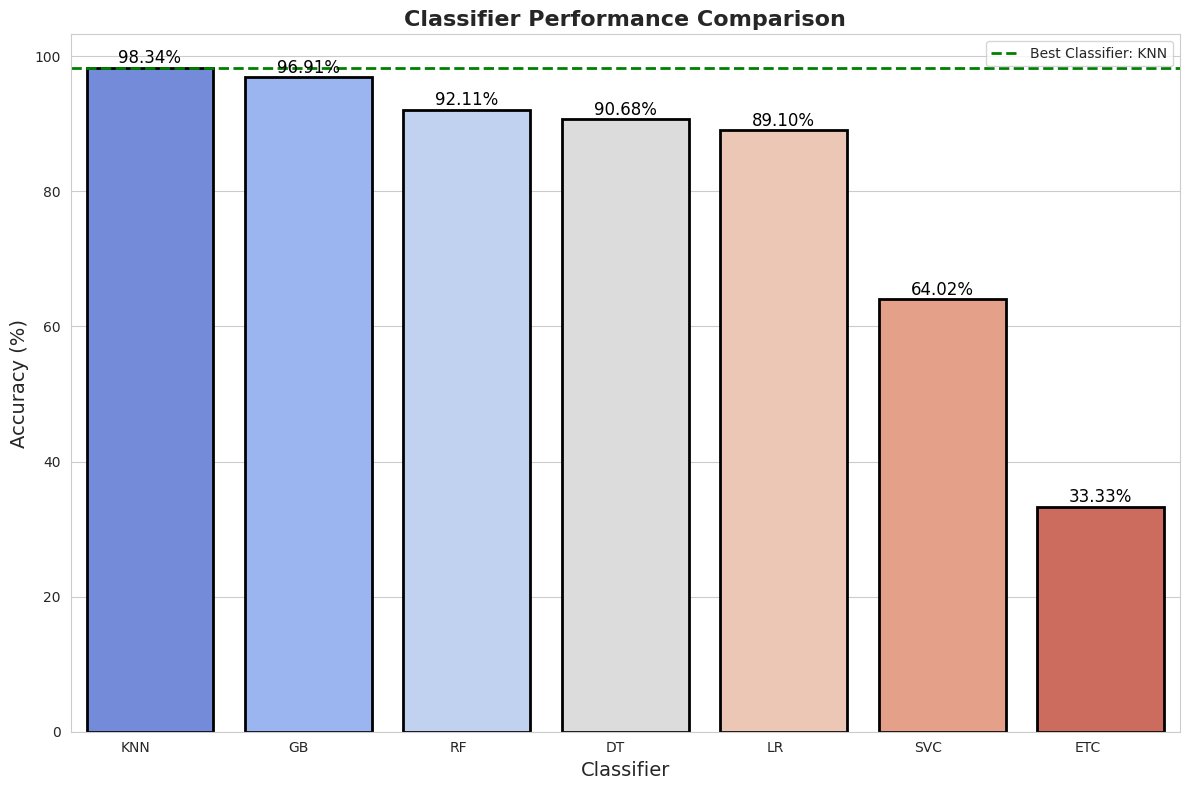

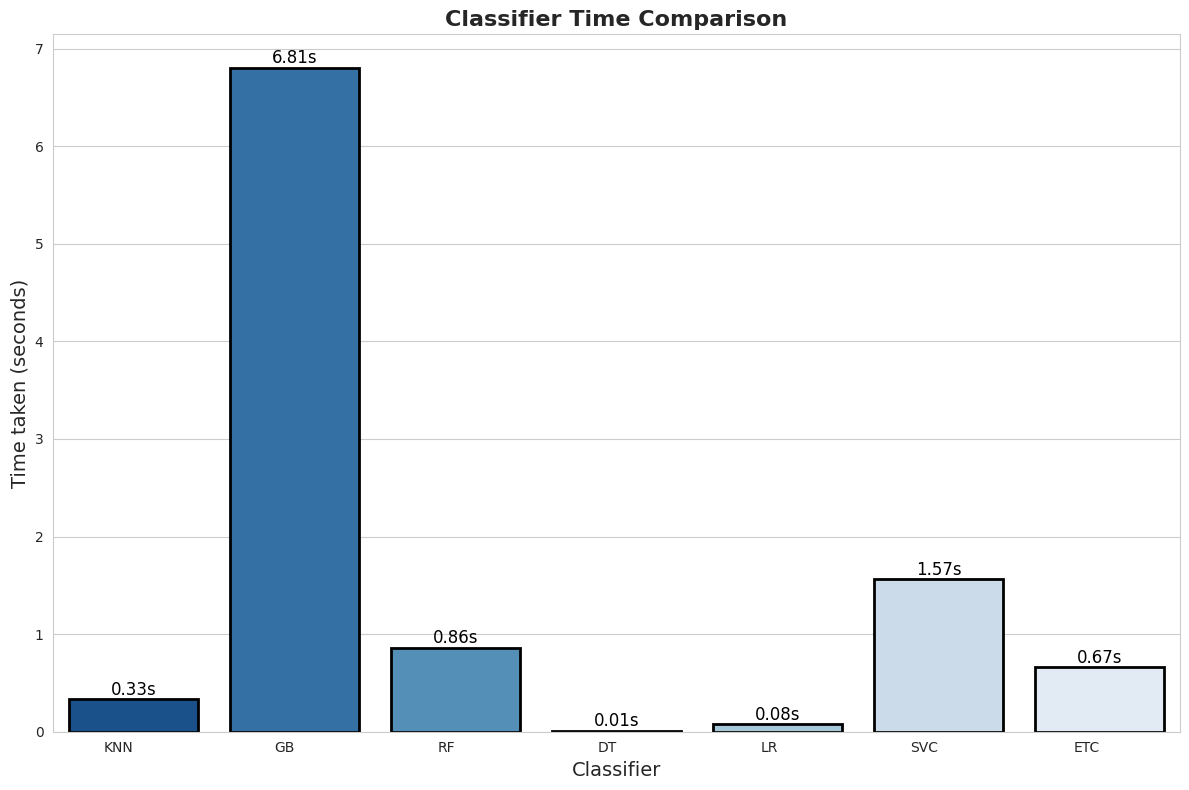

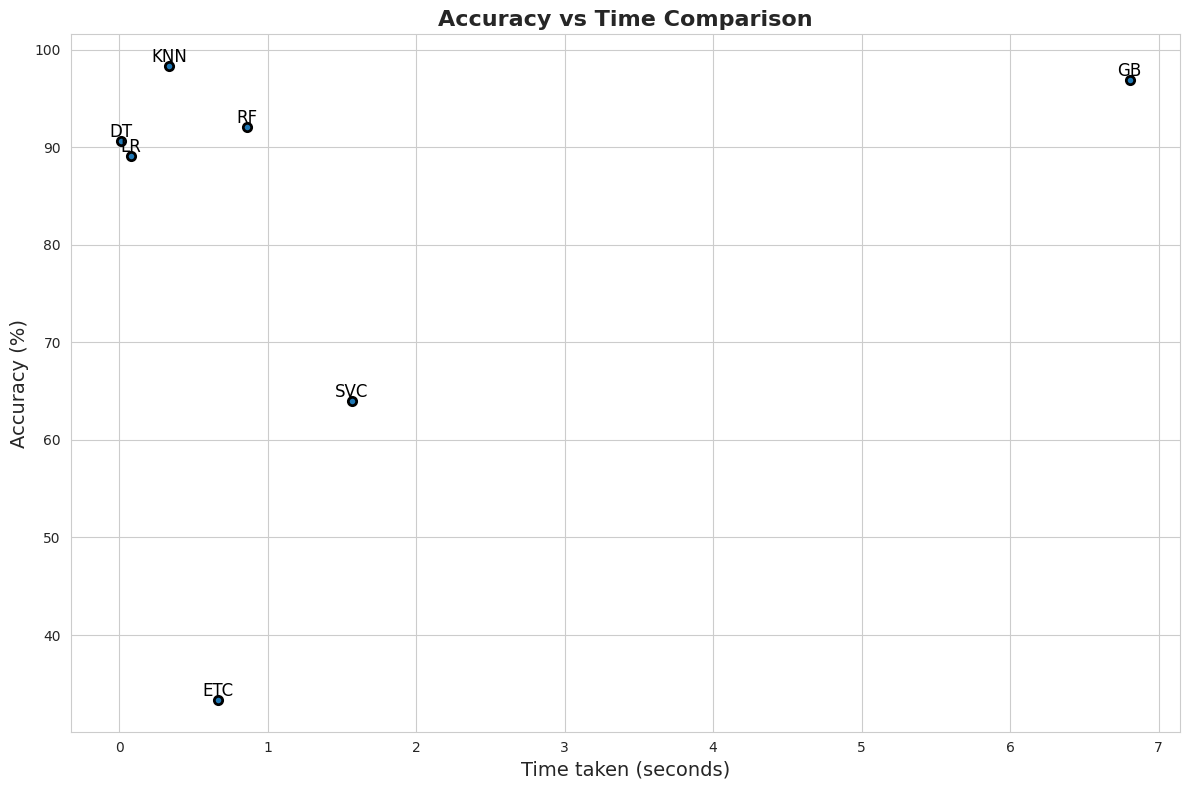

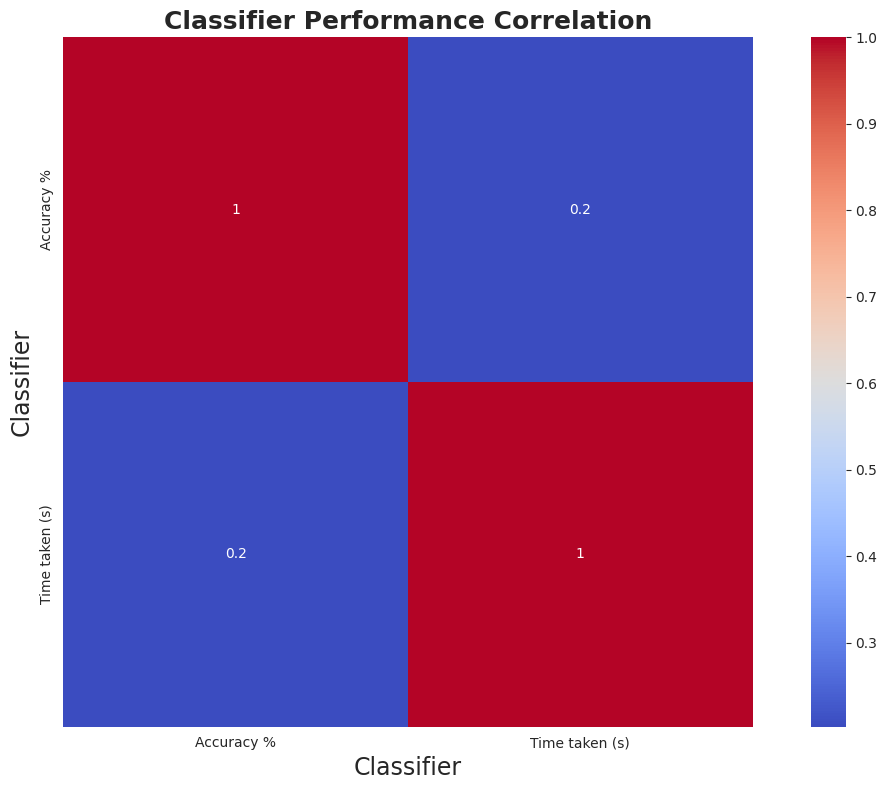

Top 3 Classifiers based on Accuracy:
  Classifier  Accuracy  Time taken (s)  Accuracy %  Rank  Time taken (min)
1        KNN  0.983385        0.334987   98.338525   1.0          0.005583
4         GB  0.969107        6.805052   96.910696   2.0          0.113418
2         RF  0.921080        0.861574   92.107996   3.0          0.014360
Top 3 Classifiers based on Time:
  Classifier  Accuracy  Time taken (s)  Accuracy %  Rank  Time taken (min)
0         DT  0.906802        0.011507   90.680166   4.0          0.000192
6         LR  0.890966        0.080198   89.096573   5.0          0.001337
1        KNN  0.983385        0.334987   98.338525   1.0          0.005583
Classifier with the best balance between Accuracy and Time:
  Classifier  Accuracy  Time taken (s)  Accuracy %  Rank  Time taken (min)
1        KNN  0.983385        0.334987   98.338525   1.0          0.005583
2         RF  0.921080        0.861574   92.107996   3.0          0.014360
0         DT  0.906802        0.011507   90.6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of accuracies and times for classifiers
accuracy_list = [dtree_accuracy, knn_accuracy, rt_accuracy, etc_accuracy, gb_accuracy, svc_accuracy, lr_accuracy]
time_list = [dtree_time, knn_time, rt_time, etc_time, gb_time, svc_time, lr_time]

# Creating a log dataframe with classifier information
log_data = {'Classifier': ['DT', 'KNN', 'RF', 'ETC', 'GB', 'SVC', 'LR'],
            'Accuracy': accuracy_list,
            'Time taken (s)': time_list}

clf_log = pd.DataFrame(log_data)

# Calculate additional statistics
clf_log['Accuracy %'] = clf_log['Accuracy'] * 100  # Convert accuracy to percentage
clf_log['Rank'] = clf_log['Accuracy'].rank(ascending=False)  # Ranking classifiers by accuracy
clf_log['Time taken (min)'] = clf_log['Time taken (s)'] / 60  # Convert time to minutes

# Sorting by accuracy for clearer visualization
clf_log = clf_log.sort_values(by='Accuracy', ascending=False)

# Print the dataframe to check
print(clf_log)

# Plotting the data using Seaborn for enhanced visualization
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a bar plot for accuracy
ax = sns.barplot(x='Classifier', y='Accuracy %', data=clf_log, palette='coolwarm', edgecolor='black', linewidth=2)
ax.set_title('Classifier Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('Classifier', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# Highlight top-performing classifier
top_accuracy = clf_log['Accuracy %'].max()
best_clf = clf_log.loc[clf_log['Accuracy %'] == top_accuracy, 'Classifier'].values[0]
plt.axhline(top_accuracy, color='green', linestyle='--', linewidth=2, label=f'Best Classifier: {best_clf}')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Plot a comparison for time taken as well
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='Classifier', y='Time taken (s)', data=clf_log, palette='Blues_r', edgecolor='black', linewidth=2)
ax2.set_title('Classifier Time Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Classifier', fontsize=14)
ax2.set_ylabel('Time taken (seconds)', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, horizontalalignment='right')

# Adding time labels
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.2f}s", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# Display the time comparison plot
plt.tight_layout()
plt.show()

# Plot a scatter plot to compare accuracy and time
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
ax3 = sns.scatterplot(x='Time taken (s)', y='Accuracy %', data=clf_log, palette='coolwarm', edgecolor='black', linewidth=2)
ax3.set_title('Accuracy vs Time Comparison', fontsize=16, fontweight='bold')
ax3.set_xlabel('Time taken (seconds)', fontsize=14)
ax3.set_ylabel('Accuracy (%)', fontsize=14)

# Adding labels to the points
for i, row in clf_log.iterrows():
    ax3.annotate(row['Classifier'], (row['Time taken (s)'], row['Accuracy %']),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# Display the scatter plot
plt.tight_layout()
plt.show()
# Plot a heatmap to compare the performance of classifiers
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
ax4 = sns.heatmap(clf_log[['Accuracy %', 'Time taken (s)']].corr(), annot=True, cmap='coolwarm', square=True)
ax4.set_title('Classifier Performance Correlation', fontsize=18, fontweight='bold')
ax4.set_xlabel('Classifier', fontsize=17)
ax4.set_ylabel('Classifier', fontsize=17)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

# Display the heatmap
plt.tight_layout()
plt.show()

# Print the top 3 classifiers based on accuracy
print("Top 3 Classifiers based on Accuracy:")
print(clf_log.nlargest(3, 'Accuracy %'))

# Print the top 3 classifiers based on time
print("Top 3 Classifiers based on Time:")
print(clf_log.nsmallest(3, 'Time taken (s)'))

# Print the classifier with the best balance between accuracy and time
print("Classifier with the best balance between Accuracy and Time:")
best_clf = clf_log.loc[(clf_log['Accuracy %'] > clf_log['Accuracy %'].mean()) & (clf_log['Time taken (s)'] < clf_log['Time taken (s)'].mean())]
print(best_clf)

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
import umap

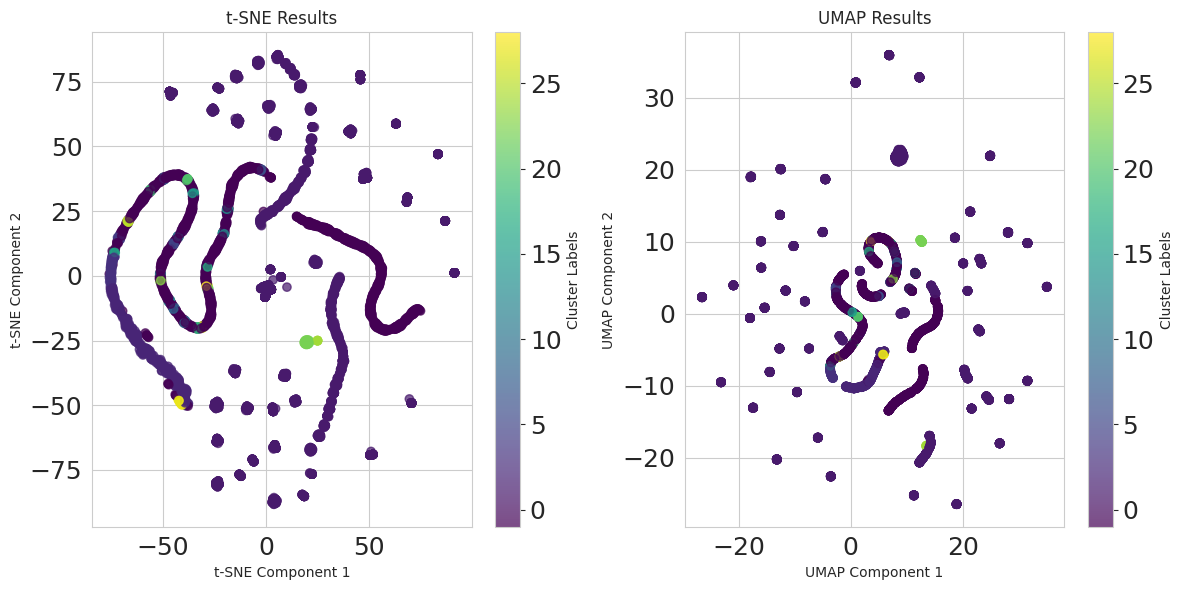

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import umap  # Ensure you have the UMAP library installed
from sklearn.cluster import DBSCAN

# Assuming X_scaled is your input data containing NaN values
# Initialize imputer to fill NaNs with the mean of each column

X_scaled = dataset[['P_HABITABLE', 'P_MASS', 'S_MASS']]

imputer = SimpleImputer(strategy='mean')  # Other strategies include 'median', 'most_frequent', or using a constant value
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # Ensure reproducibility with random_state
X_tsne = tsne.fit_transform(X_scaled_imputed)  # Use the imputed data instead of the original


# Applying DBSCAN clustering before dimensionality reduction
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You might need to adjust eps and min_samples
dbscan_labels = dbscan.fit_predict(X_scaled_imputed)  # Use the imputed data here
# Visualizing t-SNE results
plt.figure(figsize=(12, 6))  # Setting the figure size for better visibility
plt.subplot(1, 2, 1)  # Creating a 1x2 grid for subplots
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)  # Adding transparency
plt.colorbar(label='Cluster Labels')  # Adding a colorbar to indicate cluster labels
plt.title("t-SNE Results")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)  # Adding grid for better readability

# Applying UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)  # Ensure reproducibility again
X_umap = reducer.fit_transform(X_scaled_imputed)  # Use the imputed data here as well

# Visualizing UMAP results
plt.subplot(1, 2, 2)  # Next subplot in the grid
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)  # Using the same color palette
plt.colorbar(label='Cluster Labels')  # Adding a colorbar to indicate cluster labels
plt.title("UMAP Results")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)  # Adding grid for better readability

# Display the plots
plt.tight_layout()  # Adjust subplots to minimize overlap
plt.show()

#  Hyperparameter Tuning for KNN, RF, and GB

## To perform hyperparameter tuning, we can use the GridSearchCV class from scikit-learn's model_selection module.

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best Parameters for KNN:", knn_grid.best_params_)
print("Best Score for KNN:", knn_grid.best_score_)

Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score for KNN: 0.9992327365728901


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


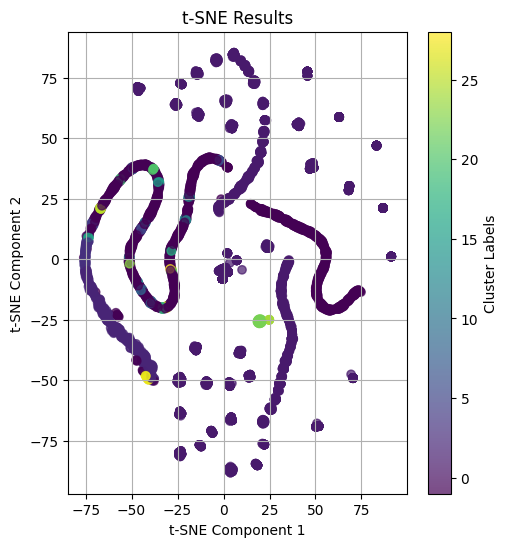

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import umap  # Ensure you have the UMAP library installed
from sklearn.cluster import DBSCAN

# Assuming X_scaled is your input data containing NaN values
# Initialize imputer to fill NaNs with the mean of each column

X_scaled = dataset[['P_HABITABLE', 'P_MASS', 'S_MASS']]

imputer = SimpleImputer(strategy='mean')  # Other strategies include 'median', 'most_frequent', or using a constant value
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Applying DBSCAN clustering before dimensionality reduction
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You might need to adjust eps and min_samples
dbscan_labels = dbscan.fit_predict(X_scaled_imputed)  # Use the imputed data here

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # Ensure reproducibility with random_state
X_tsne = tsne.fit_transform(X_scaled_imputed)  # Use the imputed data instead of the original


# Visualizing t-SNE results
plt.figure(figsize=(12, 6))  # Setting the figure size for better visibility
plt.subplot(1, 2, 1)  # Creating a 1x2 grid for subplots
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)  # Adding transparency
plt.colorbar(label='Cluster Labels')  # Adding a colorbar to indicate cluster labels
plt.title("t-SNE Results")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)  # Adding grid for better readability

# Applying UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)  # Ensure reproducibility again
X_umap = reducer.fit_transform(X_scaled_imputed)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


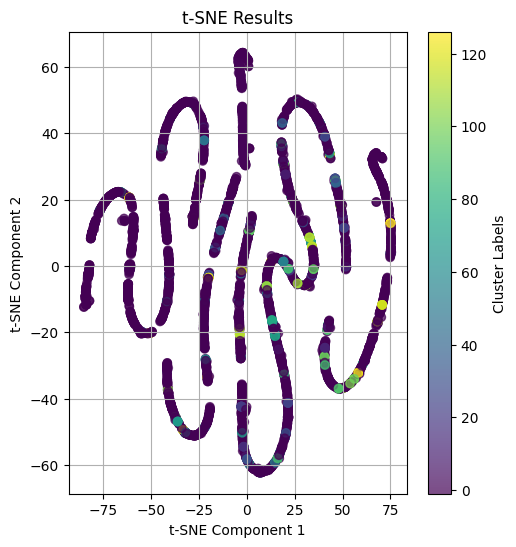

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import umap  # Ensure you have the UMAP library installed
from sklearn.cluster import DBSCAN

# Assuming X_scaled is your input data containing NaN values
# Initialize imputer to fill NaNs with the mean of each column

X_scaled = dataset[['P_HABITABLE', 'P_DISTANCE', 'S_TEMPERATURE']]

imputer = SimpleImputer(strategy='mean')  # Other strategies include 'median', 'most_frequent', or using a constant value
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Applying DBSCAN clustering before dimensionality reduction
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You might need to adjust eps and min_samples
dbscan_labels = dbscan.fit_predict(X_scaled_imputed)  # Use the imputed data here

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # Ensure reproducibility with random_state
X_tsne = tsne.fit_transform(X_scaled_imputed)  # Use the imputed data instead of the original


# Visualizing t-SNE results
plt.figure(figsize=(12, 6))  # Setting the figure size for better visibility
plt.subplot(1, 2, 1)  # Creating a 1x2 grid for subplots
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)  # Adding transparency
plt.colorbar(label='Cluster Labels')  # Adding a colorbar to indicate cluster labels
plt.title("t-SNE Results")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)  # Adding grid for better readability

# Applying UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)  # Ensure reproducibility again
X_umap = reducer.fit_transform(X_scaled_imputed)